In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as mtick
%matplotlib inline
from random import sample
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# QUESTION


In [2]:
df = pd.read_csv('P2P-Loan.csv')
df.head()

,loan_amnt,term_mths,int_rate,installment,grade,empl_yrs,annual_inc,verification_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,loan_status
0,5000,36,9.67,160.57,1,2.0,63000.0,0,6.74,12,0,7603,57.2,33,3,0,1
1,9250,36,15.31,322.07,1,10.0,38000.0,0,5.42,7,0,8939,62.5,10,1,0,1
2,10350,36,16.29,365.36,1,10.0,78000.0,0,12.69,6,0,2039,25.2,7,0,0,1
3,5000,36,15.22,173.87,1,2.0,41000.0,0,20.74,6,0,5436,83.6,12,0,0,1
4,7750,36,11.14,254.24,1,7.0,56000.0,0,0.54,6,0,991,6.5,27,0,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             20000 non-null  int64  
 1   term_mths             20000 non-null  int64  
 2   int_rate              20000 non-null  float64
 3   installment           20000 non-null  float64
 4   grade                 20000 non-null  int64  
 5   empl_yrs              20000 non-null  float64
 6   annual_inc            20000 non-null  float64
 7   verification_status   20000 non-null  int64  
 8   dti                   20000 non-null  float64
 9   open_acc              20000 non-null  int64  
 10  pub_rec               20000 non-null  int64  
 11  revol_bal             20000 non-null  int64  
 12  revol_util            20000 non-null  float64
 13  total_acc             20000 non-null  int64  
 14  mort_acc              20000 non-null  int64  
 15  pub_rec_bankruptcie

In [4]:
X = df[df.columns[:-1]]
Y = df[df.columns[-1]]

In [5]:
#Splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 Y,
                                                 test_size=0.2,
                                                 random_state=0)

In [6]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
X_train, y_train

(16000, 16) (16000,) (4000, 16) (4000,)


(       loan_amnt  term_mths  int_rate  installment  grade  empl_yrs  \
 17815      15000         36      6.62       460.56      1      10.0   
 18370      35000         36     26.49      1419.33      0       2.0   
 1379        4000         36      7.90       125.17      1       9.0   
 14763      21000         60     20.99       568.01      0      10.0   
 7346       24250         36     18.99       888.79      0       2.0   
 ...          ...        ...       ...          ...    ...       ...   
 13123      20000         60     17.57       503.21      0      10.0   
 19648      10500         36     14.64       362.14      1       7.0   
 9845       12000         60     15.61       289.34      0       5.0   
 10799      20000         36      9.67       642.25      1       8.0   
 2732        2400         36     11.99        79.71      1      10.0   
 
        annual_inc  verification_status    dti  open_acc  pub_rec  revol_bal  \
 17815    210000.0                    1  12.27        

# Q1

In [7]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators=500, 
                                  random_state=1, 
                                  max_features="sqrt", 
                                  max_depth=34)
### default n_estimators/trees = 100; default criterion = 'gini' 
### max_features default case is "sqrt"; unlike DecisionTree Classifier where default case = "none"
### If max_depth=None, then nodes are expanded until all leaves are pure or until all leaves contain less than 
###   min_samples_split samples -- usu 2
### bootsrapping - bagging, default=true
### oob_scorebool, default=False -- Whether to use out-of-bag samples to estimate the generalization score. 
###    Only available if bootstrap=True.
RF_model.fit(X_train,y_train)

y_pred_RF = RF_model.predict(X_test)
Accuracy_RF = metrics.accuracy_score(y_test, y_pred_RF)
print("RF Accuracy:",Accuracy_RF)

RF Accuracy: 0.6505


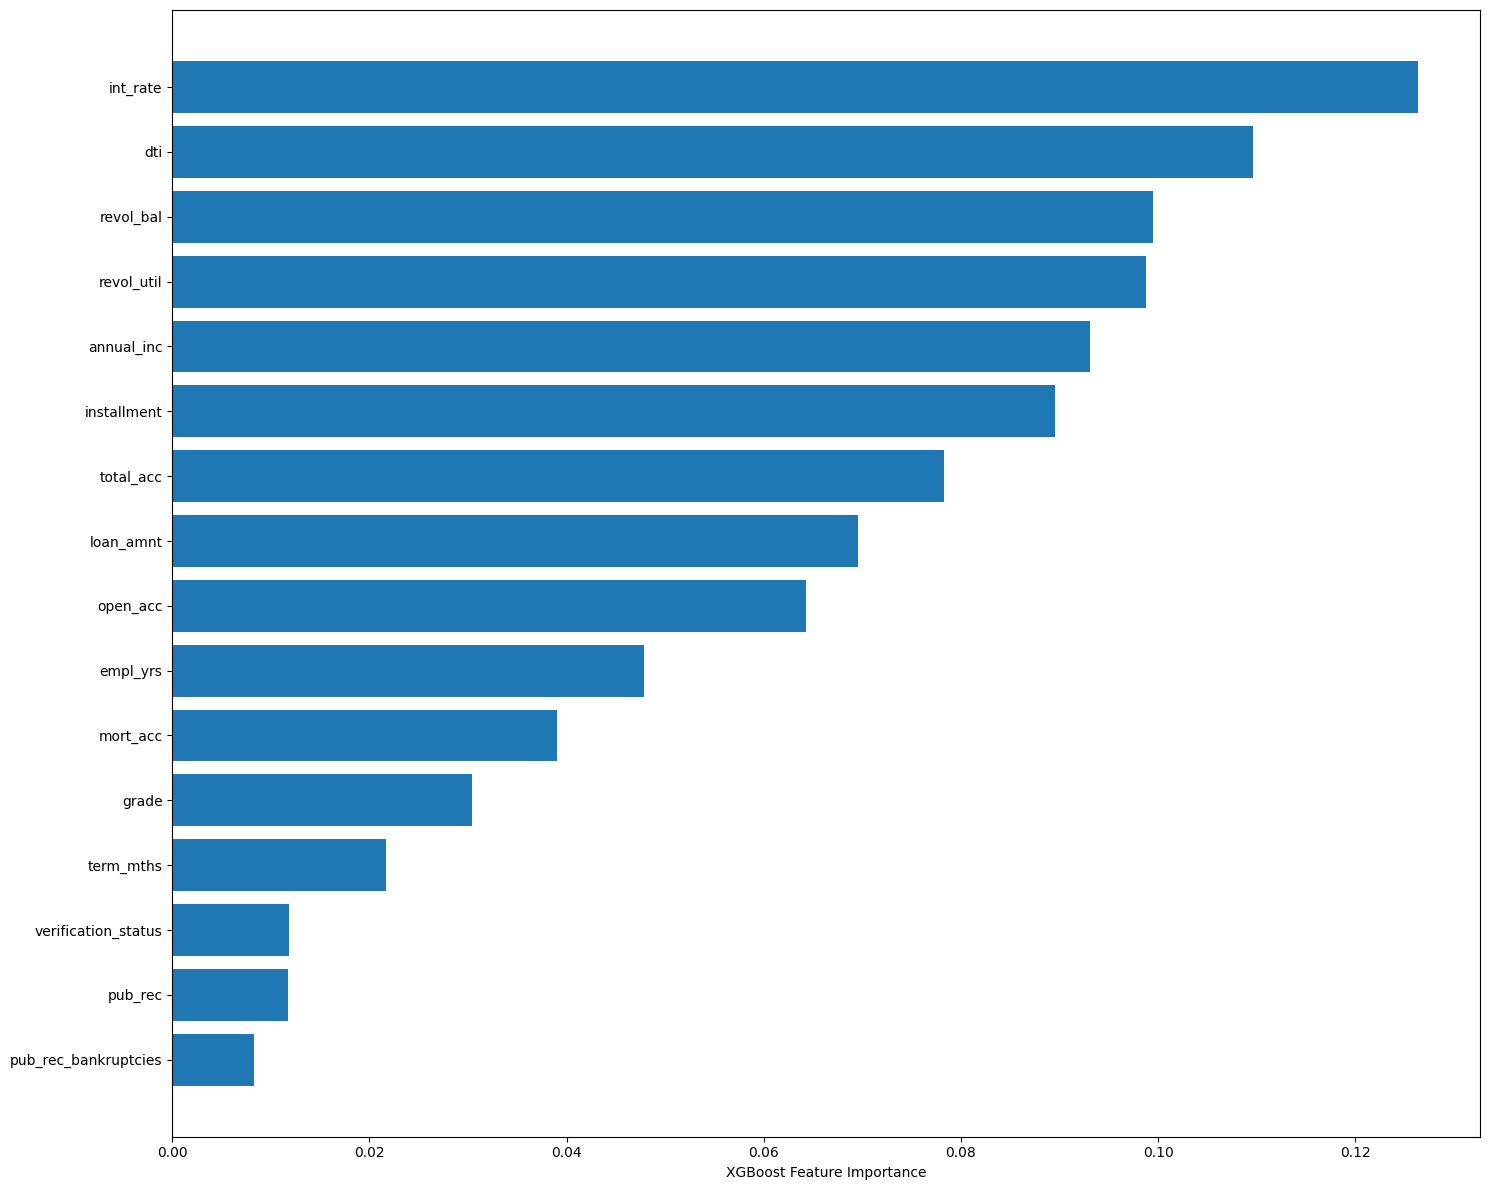

<Figure size 1600x1200 with 0 Axes>

In [8]:
### representation

fig, ax = plt.subplots(figsize=(15,12))

sorted_idx = RF_model.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx],RF_model.feature_importances_[sorted_idx])
plt.xlabel("XGBoost Feature Importance")
plt.figure(figsize=(20, 15), dpi=80)
fig.tight_layout()

# Q2

In [9]:
# XGBoost
from xgboost import XGBClassifier
XG_model = XGBClassifier(n_estimators=500, 
                         random_state=1, 
                         learning_rate=0.01, 
                         max_depth=4, 
                        objective='binary:logistic')

### Note for multiclass, objective='multi:softprob'
XG_model.fit(X_train,y_train)

### XG_model follows GB model to have n_estimators = 1000 and max_depth = 24
y_pred_XG = XG_model.predict(X_test)
Accuracy_XG = metrics.accuracy_score(y_test, y_pred_XG)
print("XG Accuracy:",Accuracy_XG)

XG Accuracy: 0.65425


In [11]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_XG)
print(confusion_matrix)

[[1244  724]
 [ 659 1373]]


In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_XG))

              precision    recall  f1-score   support

           0       0.65      0.63      0.64      1968
           1       0.65      0.68      0.67      2032

    accuracy                           0.65      4000
   macro avg       0.65      0.65      0.65      4000
weighted avg       0.65      0.65      0.65      4000



In [12]:
recall = 1244/(1244+724)
precision = 1244/(1244+659)
print(f"recall is {recall}, precision is {precision}")

recall is 0.6321138211382114, precision is 0.6537046768260641


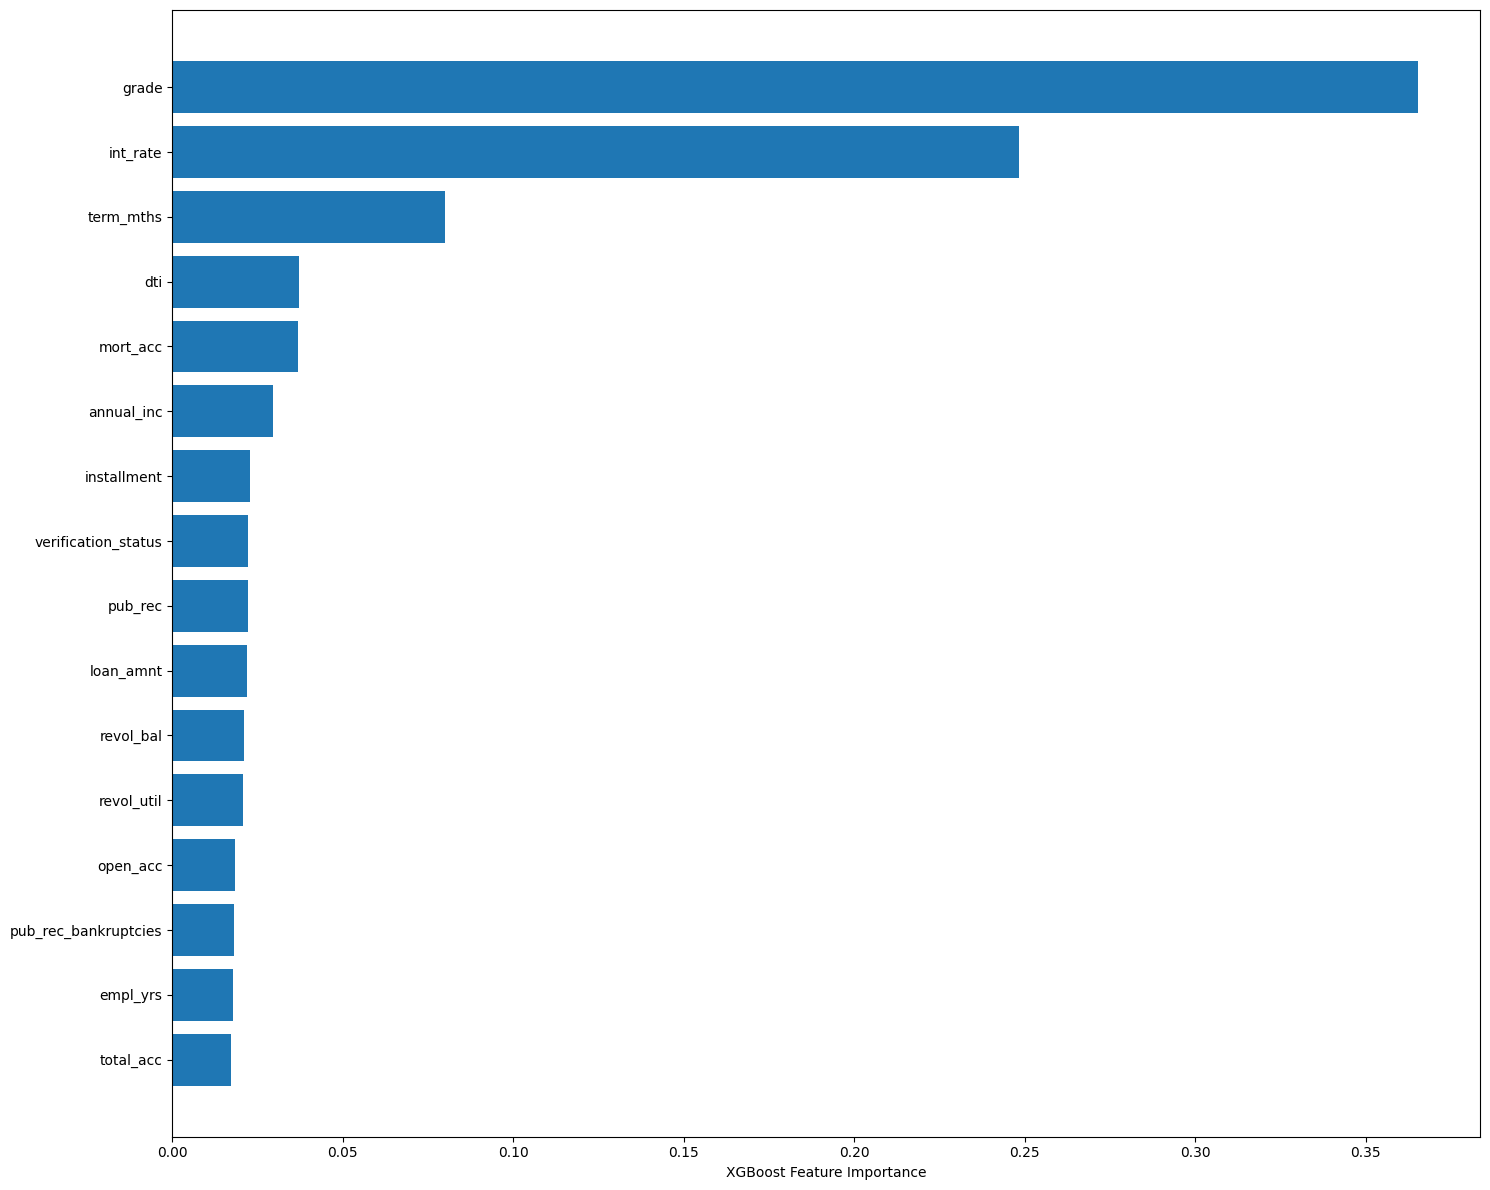

<Figure size 1600x1200 with 0 Axes>

In [13]:
### representation

fig, ax = plt.subplots(figsize=(15,12))

sorted_idx = XG_model.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx],XG_model.feature_importances_[sorted_idx])
plt.xlabel("XGBoost Feature Importance")
plt.figure(figsize=(20, 15), dpi=80)
fig.tight_layout()

# Q3

# Q4

In [14]:
df.columns

Index(['loan_amnt', 'term_mths', 'int_rate', 'installment', 'grade',
       'empl_yrs', 'annual_inc', 'verification_status', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_status'],
      dtype='object')

In [16]:
import numpy as np

# Convert the test data into a 2D array
test_data = np.array([
    [1_000, 60, 10, 360, 1, 5, 10_000, 0, 10, 3, 0, 10_000, 50, 5, 1, 0],  # Test sample A
    [1_000, 60, 8, 120, 1, 10, 120_000, 1, 5, 1, 0, 100_000, 5, 2, 1, 1]   # Test sample B
])

# Use the predict method (assuming your model is already trained and called 'model')
predictions = XG_model.predict(test_data)

# Print predictions
print(predictions)


[1 0]


In [17]:
import shap

# Fits the explainer - named the shap-values1 to differentiate from the previous setup
explainer = shap.Explainer(XG_model, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
 99%|===================| 3948/4000 [00:25<00:00]        

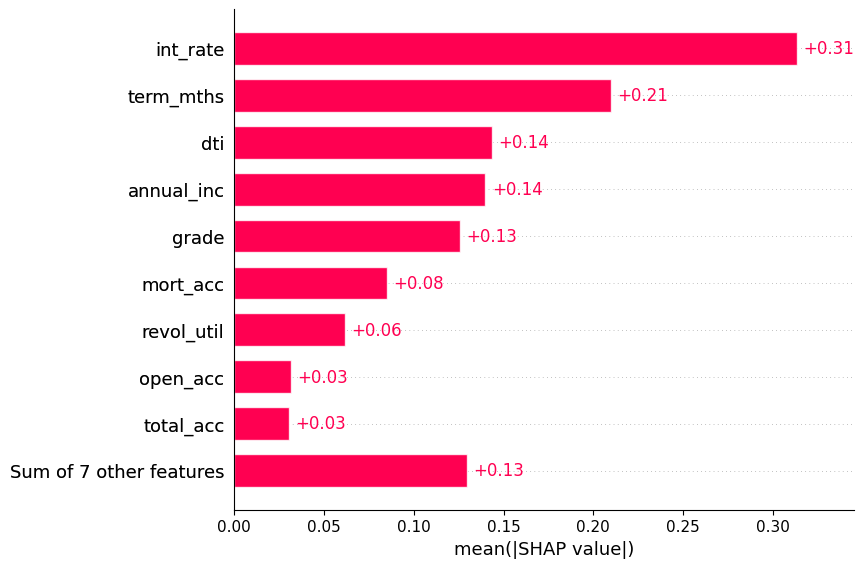

In [18]:
shap.plots.bar(shap_values)